In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
 #performance
from sklearn.model_selection import train_test_split #data spliting hold out
from sklearn.metrics import precision_recall_curve #performance
from sklearn import metrics # performance
from sklearn.neighbors import KNeighborsClassifier #KNN algorithm

# Reading the dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/ParisHousingClass.csv')

# data overview

In [4]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [5]:
df.shape

(10000, 18)

# Checking the missing data

In [6]:
df.isnull().sum().sort_values(ascending=False)

squareMeters         0
numberOfRooms        0
price                0
hasGuestRoom         0
hasStorageRoom       0
garage               0
attic                0
basement             0
hasStormProtector    0
isNewBuilt           0
made                 0
numPrevOwners        0
cityPartRange        0
cityCode             0
floors               0
hasPool              0
hasYard              0
category             0
dtype: int64

# Checking the correlation

<ipython-input-7-87efb627274f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_ploting = df.corr(method= 'pearson') #pearson : standard correlation coefficient


<Axes: >

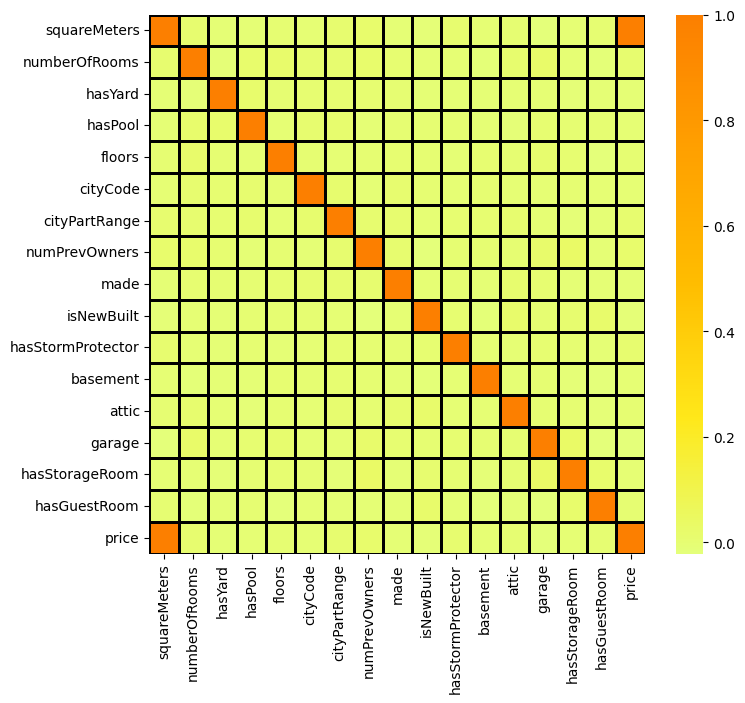

In [7]:
fig = plt.figure(figsize = (8,7))
data_ploting = df.corr(method= 'pearson') #pearson : standard correlation coefficient
sns.heatmap(data_ploting, cmap='Wistia', linecolor='black', linewidths= 2 )

<Axes: >

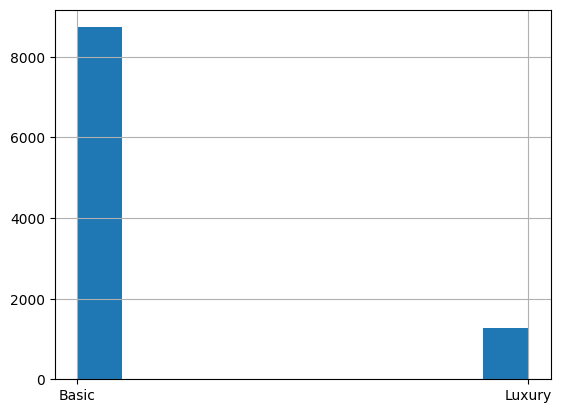

In [8]:
df['category'].hist()

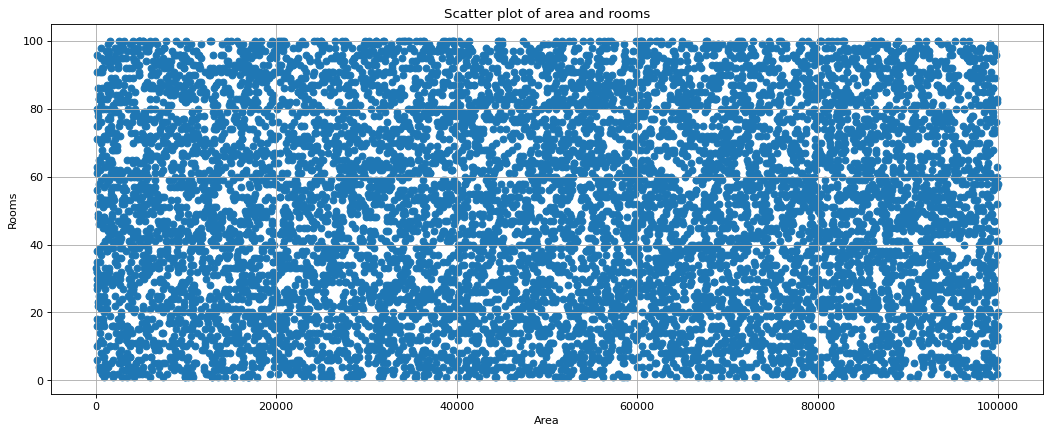

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter

figure(figsize=(16, 6), dpi=80)
plt.scatter(df['squareMeters'], df['numberOfRooms'])
plt.xlabel('Area')
plt.ylabel('Rooms')
plt.title('Scatter plot of area and rooms')
plt.grid(True)
plt.show()

<Axes: >

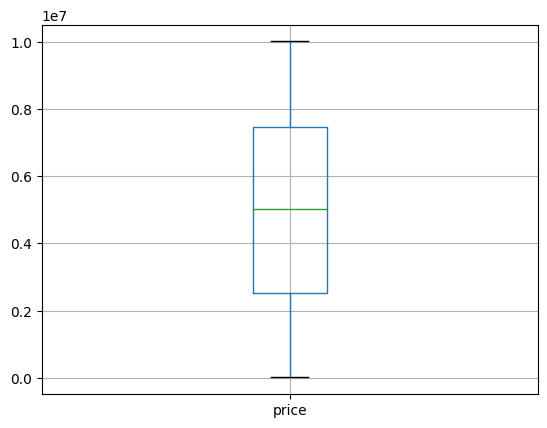

In [29]:
df.boxplot(column='price') # For anomaly detection


<Axes: >

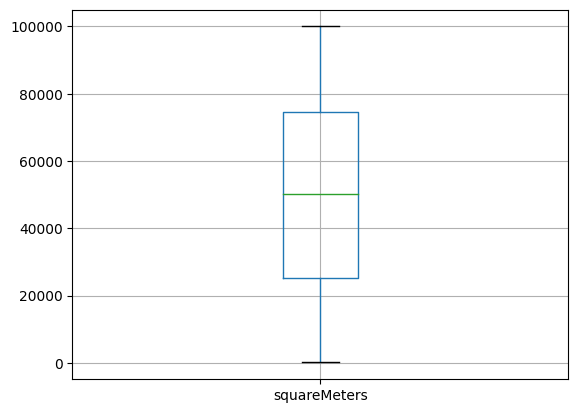

In [30]:
df.boxplot(column='squareMeters')

# Train and test split

In [11]:
#print(pd.factorize(df['category'])[0])
df['category'] = pd.factorize(df['category'])[0]
X = df.drop('category', axis = 1)
y = df['category']
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.7, random_state=101) #training 70%

# Scalling data

In [12]:
scaler_train= StandardScaler() #calculate standard deviation and data normalize
scaler_train.fit(X_train)
scaler_test= StandardScaler()
scaler_test.fit(X_test)
X_train_scaled= scaler_train.transform(X_train)
X_test_scaled= scaler_test.transform(X_test)

# KNN Model

In [13]:
test_error_rate= []


for k in range (1, 15):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error=1- accuracy_score(y_test, y_pred_test)
    test_error_rate.append(test_error)

In [14]:
print(test_error_rate)

[0.017000000000000015, 0.02300000000000002, 0.007333333333333303, 0.013000000000000012, 0.006000000000000005, 0.01100000000000001, 0.006000000000000005, 0.010333333333333306, 0.005666666666666709, 0.009666666666666712, 0.0050000000000000044, 0.007333333333333303, 0.0043333333333333, 0.0076666666666667105]


# Elbow Figure

Text(0.5, 0, 'K Value')

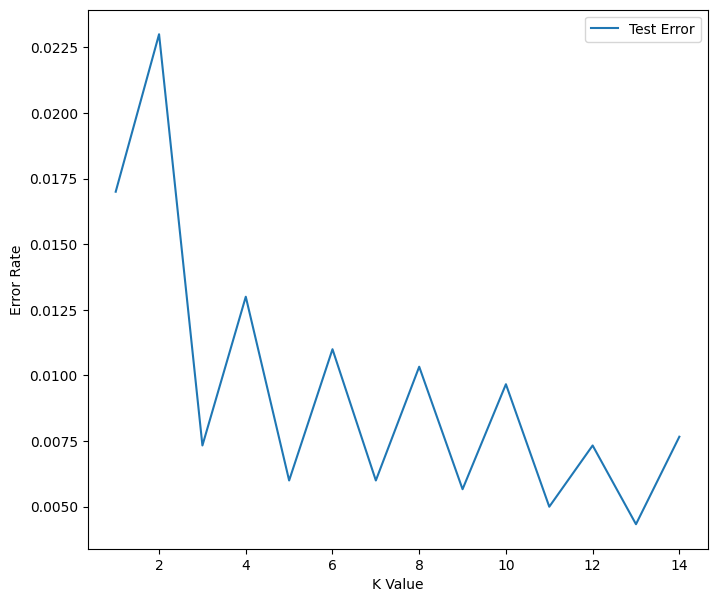

In [15]:
plt.figure(figsize=(8, 7))
plt.plot(range(1, 15), test_error_rate, label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel('K Value')

# Final Model

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train) 
y_pred = knn_model.predict(X_test_scaled) 
y_pred = pd.DataFrame(y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE =np.sqrt(MSE)
print(RMSE)

0.08563488385776753


# Evaluation

In [17]:
accuracy_score(y_test, y_pred)

0.9926666666666667

# Confusion Matrix

In [ ]:
confusion_matrix(y_test, y_pred)

array([[2608,    9],
       [  13,  370]])

# Classification Report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2617
           2       0.98      0.97      0.97       383

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



# Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import pandas as pd
import numpy as np


dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
y_pred = dt_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print(RMSE)

0.0


# Evalution

In [19]:
accuracy_score(y_test, y_pred)

1.0

# Classification Report

In [ ]:
confusion_matrix(y_test, y_pred)

array([[2617,    0],
       [   0,  383]])

In [31]:
X_train_scaled

array([[-0.94243966, -0.9522682 , -1.00803226, ...,  0.99686207,
         0.3087448 , -0.94382003],
       [-1.36965731, -0.64036079, -1.00803226, ...,  0.99686207,
        -1.5785033 , -1.36947629],
       [-1.17600153, -1.61073942,  0.99203175, ...,  0.99686207,
         0.62328616, -1.17706035],
       ...,
       [-0.91894095, -1.6453958 , -1.00803226, ..., -1.00314781,
        -0.63487925, -0.92082256],
       [-1.69637974, -0.67501717, -1.00803226, ...,  0.99686207,
         0.93782751, -1.696969  ],
       [ 1.13389374, -0.91761182,  0.99203175, ..., -1.00314781,
        -1.26396195,  1.13548931]])

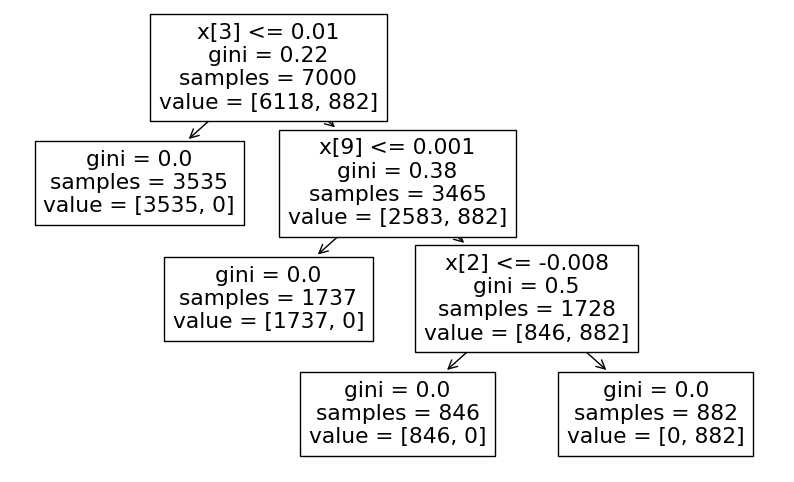

In [20]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(10, 6))
tree.plot_tree(dt_model.fit(X_train_scaled, y_train))
plt.show()

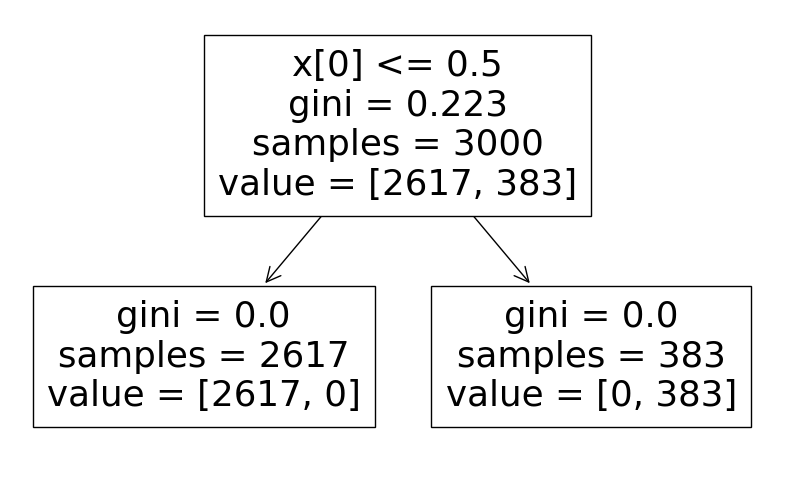

In [21]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(10, 6))
tree.plot_tree(dt_model.fit(y_test.values.reshape(-1, 1), y_pred.values.reshape(-1, 1)))
plt.show()

# Classification Report

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2617
           1       1.00      1.00      1.00       383

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



# Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
import numpy as np


lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred = lr_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print(RMSE)

# Get the slope (m) and intercept (c) values
m = lr_model.coef_[0]
c = lr_model.intercept_

# Print the slope, intercept, and RMSE
print("Slope (m):", m)
print("Intercept (c):", c)


0.2514135155735345
Slope (m): 2.6946138286272086
Intercept (c): 0.12599999999999964


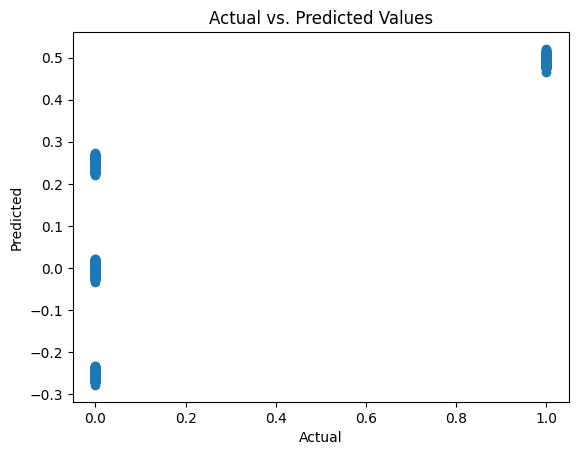

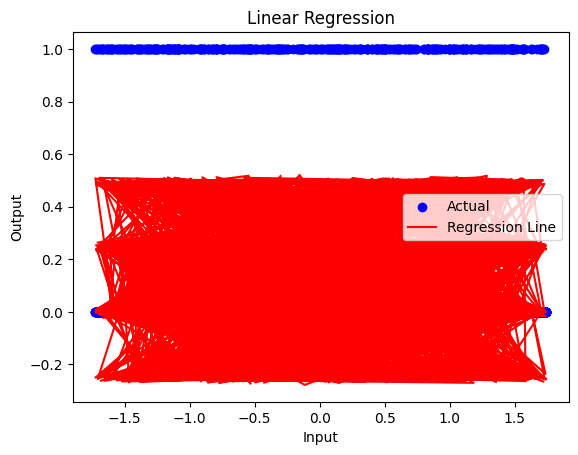

In [24]:
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted Values")
plt.show()

# Plot the regression line
plt.scatter(X_test_scaled[:, 0], y_test, color='blue', label='Actual')
plt.plot(X_test_scaled[:, 0], y_pred, color='red', label='Regression Line')
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("Linear Regression")
plt.legend()
plt.show()

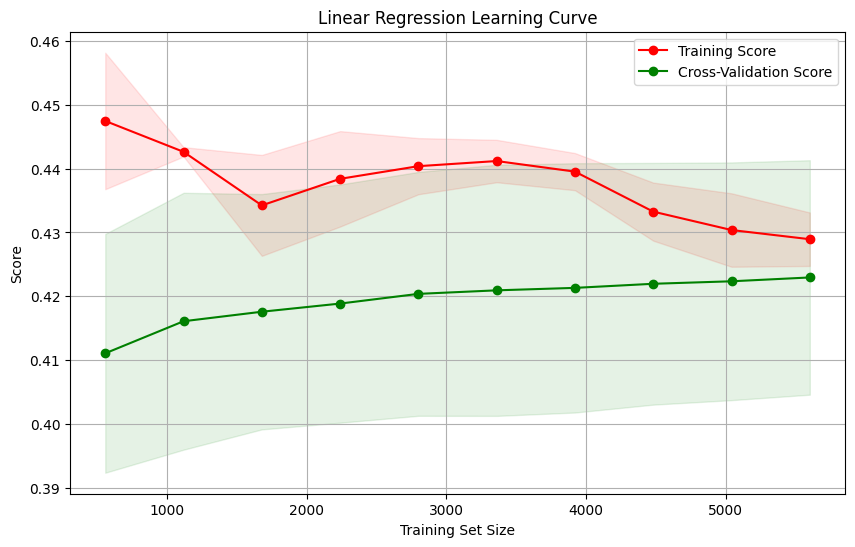

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve


model = LinearRegression()

# Generate the learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5
)

# Calculate the mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title("Linear Regression Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.grid(True)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training Score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g",
         label="Cross-Validation Score")
plt.legend(loc="best")
plt.show()


# K Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

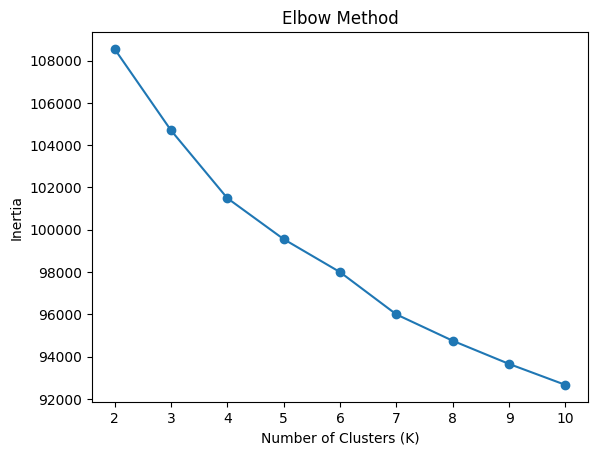

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.059767167742915094
Cluster Centers:
[[-1.01876975e+00 -1.09830660e-02  3.58730143e-02  2.95000823e-02
   6.58127538e-04  1.76938089e-02 -4.16454922e-02 -3.98717930e-02
   9.99502664e-03 -8.32074068e-03 -1.01254003e-02  3.35228965e-03
  -7.78408208e-03  8.78637172e-03  5.91009684e-03 -7.54886727e-03
  -1.01875026e+00]
 [ 7.38093221e-01  3.57490942e-03  9.92031746e-01  1.04933783e-02
   3.42608442e-03 -8.35817680e-03  2.15829587e-02  3.41374540e-02
   1.13533048e-02  9.35718761e-04 -1.87936256e-02 -5.06703658e-02
   2.63997218e-02 -2.50917812e-02 -5.60715295e-03  3.81486859e-03
   7.38636390e-01]
 [ 6.80474306e-01  1.15721174e-02 -1.00803226e+00 -5.05075278e-02
  -4.21232377e-03 -1.61304805e-02  3.61191188e-02  2.15564055e-02
  -2.46505821e-02  1.04805116e-02  3.20211606e-02  4.43937096e-02
  -1.48685812e-02  1.22328559e-02 -2.66645297e-03  6.64124746e-03
   6.79922583e-01]]
Inertia: 104704.34236140776


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
from sklearn.cluster import KMeans
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a range of K values to test
k_values = range(2, 11)  # Set the range of K values to test

# Create a list to store the inertia values
inertia_values = []

# Iterate over each K value
for k in k_values:
    # Create a K-means clustering model
    kmeans_model = KMeans(n_clusters=k)
    
    # Fit the K-means model to the scaled training data
    kmeans_model.fit(X_train_scaled)
    
    # Append the inertia value to the list
    inertia_values.append(kmeans_model.inertia_)

# Plot the inertia values against the number of clusters
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Choose the optimal number of clusters based on the elbow plot
optimal_k = 3  # Set the optimal number of clusters based on the plot

# Create the final K-means clustering model with the optimal number of clusters
kmeans_model_final = KMeans(n_clusters=optimal_k)

# Fit the final model to the scaled training data
kmeans_model_final.fit(X_train_scaled)

# Predict the cluster labels for the test data
y_pred = kmeans_model_final.predict(X_test_scaled)

# Convert the predicted cluster labels to a DataFrame
y_pred = pd.DataFrame(y_pred)

# Calculate the silhouette score
silhouette_score = metrics.silhouette_score(X_test_scaled, y_pred)

print("Silhouette Score:", silhouette_score)

# Get the cluster centers
cluster_centers = kmeans_model_final.cluster_centers_

print("Cluster Centers:")
print(cluster_centers)

# Get the inertia (sum of squared distances of samples to their closest cluster center)
inertia = kmeans_model_final.inertia_

print("Inertia:", inertia)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-27-e0b4ca0c3c93>:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_data[:, 0], cluster_data[:, 1], cmap='viridis', label=f"Cluster {i+1}")


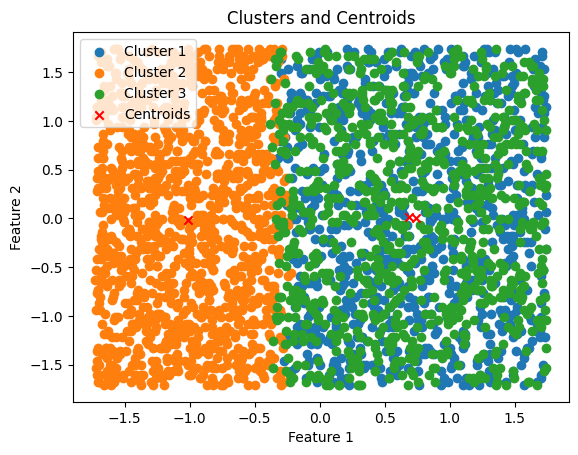

In [27]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the optimal number of clusters
optimal_k = 3  # Replace with the chosen optimal number of clusters

# Create a K-means clustering model with the optimal number of clusters
kmeans_model = KMeans(n_clusters=optimal_k)

# Fit the K-means model to the scaled training data
kmeans_model.fit(X_train_scaled)

# Predict the cluster labels for the test data
cluster_labels = kmeans_model.predict(X_test_scaled)

# Get the cluster centers
cluster_centers = kmeans_model.cluster_centers_

# Plot all the clusters
for i in range(optimal_k):
    cluster_data = X_test_scaled[cluster_labels == i]  # Get data points belonging to the current cluster
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], cmap='viridis', label=f"Cluster {i+1}")

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', c='red', label='Centroids')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Clusters and Centroids")
plt.legend()
plt.show()
